In [2]:
import torch
from models.resnet import ResNetGenerator
netG = ResNetGenerator()

In [3]:
model_path = 'data\pretrained_models\horse2zebra_0.4.0.pth'
model_param = torch.load(model_path)
netG.load_state_dict(model_param)

<All keys matched successfully>

In [4]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [29]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

def horse2zebra(file_name):
    preprocess = transforms.Compose([transforms.Resize(256),
                                    transforms.ToTensor()])
    img_before = Image.open('images/horse/' + file_name)
    img_t = preprocess(img_before)
    batch_t = torch.unsqueeze(img_t, 0)
    batch_out = netG(batch_t)
    out_t = (batch_out.data.squeeze() + 1.0) / 2.0
    out_img = transforms.ToPILImage()(out_t)
    out_img.save('images/zebra/'+file_name)
    img_after = Image.open('images/zebra/'+file_name)
    
    fig, axs = plt.subplots(1,2, figsize = (10,10))

    axs[0].imshow(img_before)
    axs[0].axis('off')
    axs[0].set_title('Before')
    axs[1].imshow(img_after)
    axs[1].axis('off')
    axs[1].set_title('After')
    fig.tight_layout()

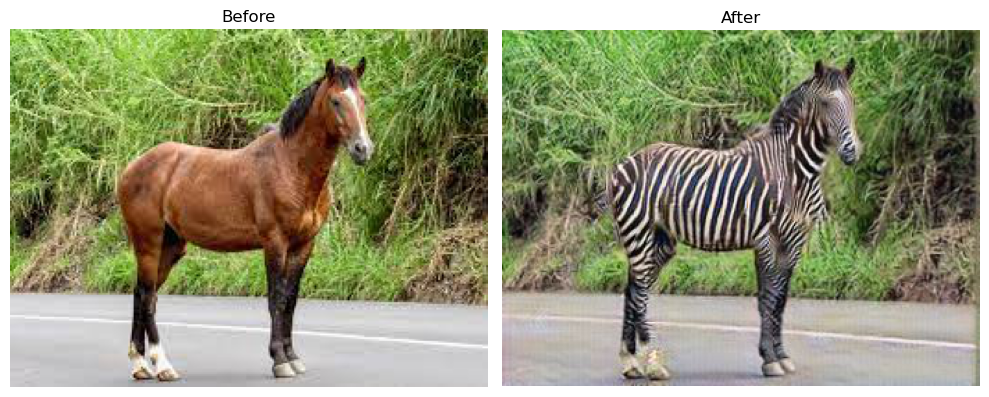

In [30]:
horse2zebra('horse1.jpg')

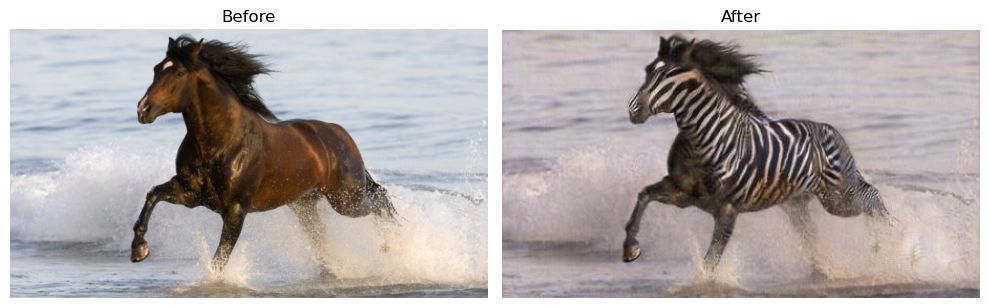

In [31]:
horse2zebra('horse2.jpg')

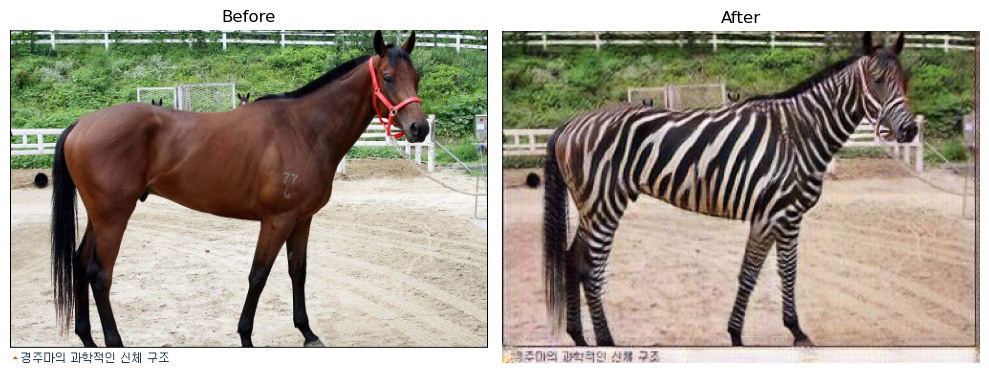

In [32]:
horse2zebra('horse3.jpg')

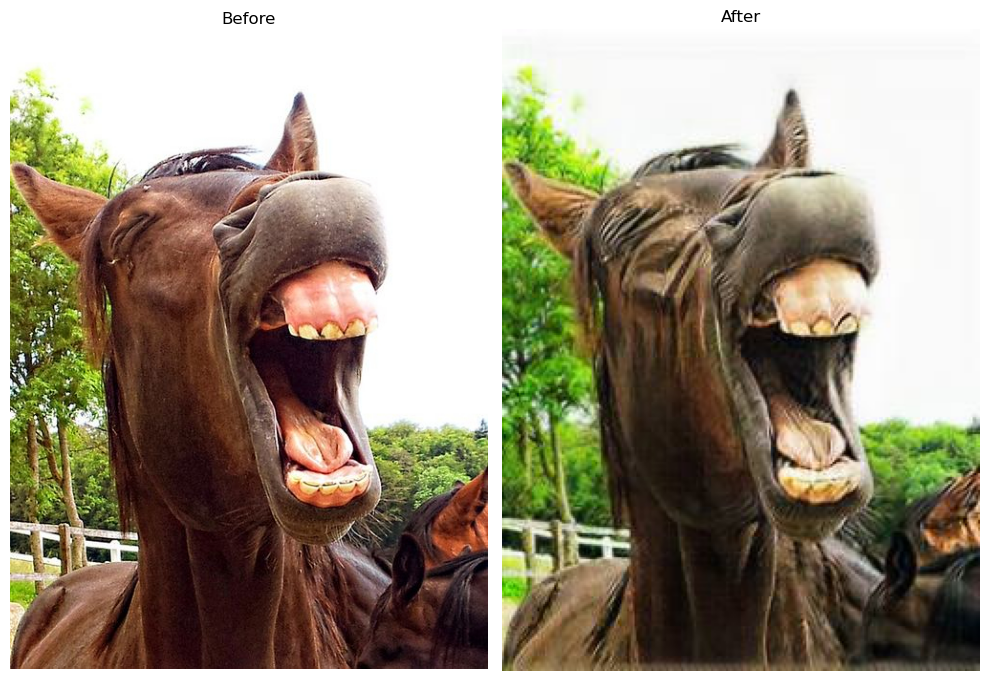

In [33]:
horse2zebra('horse4.jpg')

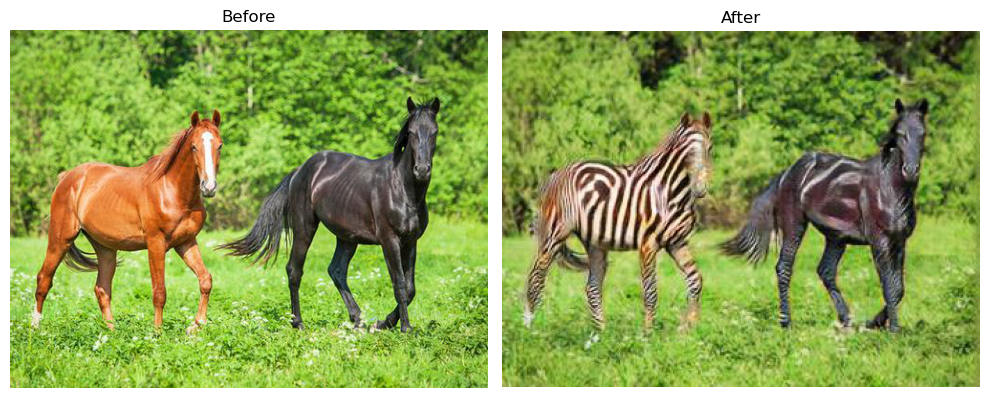

In [34]:
horse2zebra('horse5.jpg')

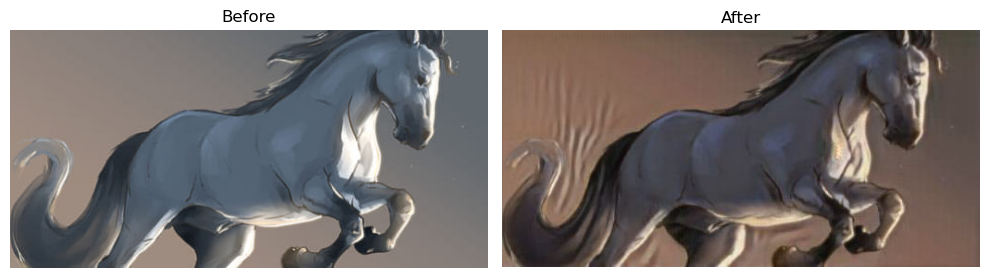

In [35]:
horse2zebra('horse6.jpg')

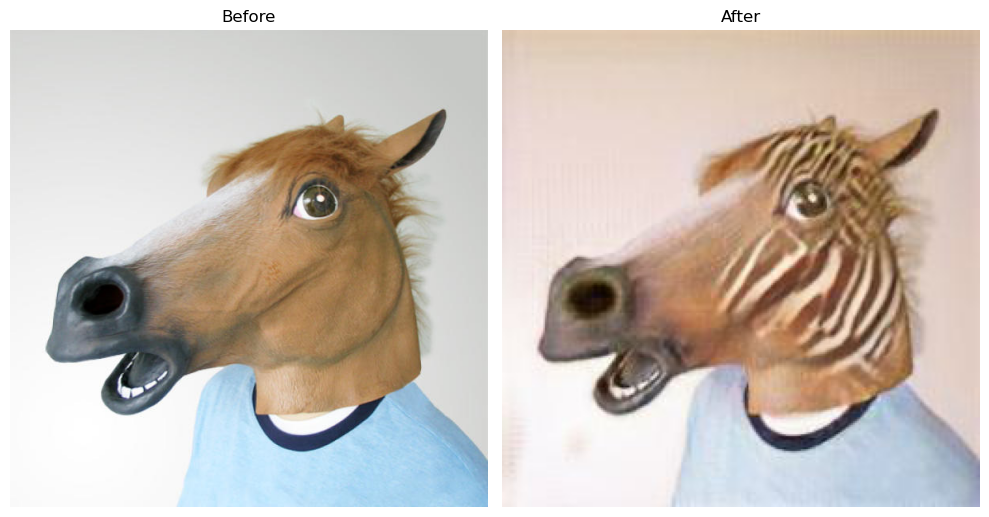

In [36]:
horse2zebra('horse7.jpg')

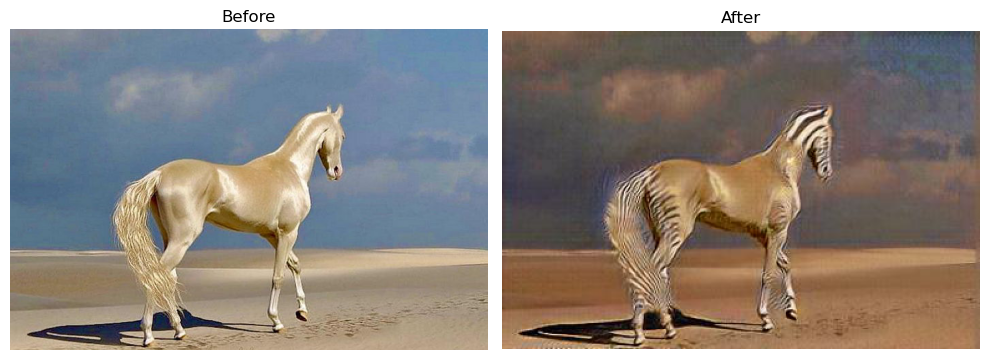

In [37]:
horse2zebra('horse8.jpg')

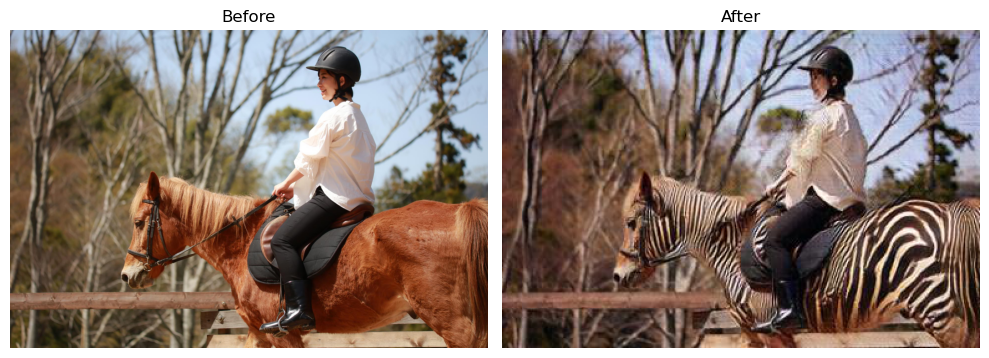

In [38]:
horse2zebra('horse9.jpg')

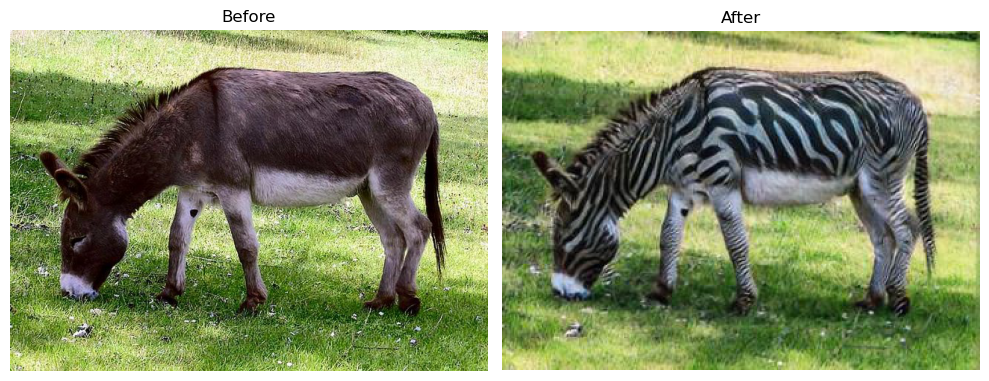

In [39]:
horse2zebra('donky1.jpg')